In [20]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 4

In [21]:
from AJ_ML_Library import models_classification

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
train = pd.read_csv('data/train_modified_9.csv')
test = pd.read_csv('data/test_modified_9.csv')

In [24]:
train.shape, test.shape

((7381, 231), (11171, 230))

In [25]:
train.columns

Index([u'event_type 10', u'event_type 11', u'event_type 13', u'event_type 14',
       u'event_type 15', u'event_type 18', u'event_type 2', u'event_type 20',
       u'event_type 21', u'event_type 22',
       ...
       u'pattern_event', u'pattern_event_count', u'pattern_resource',
       u'pattern_resource_count', u'pattern_all', u'pattern_all_count',
       u'resource_count', u'event_count', u'occurence2_count_severity_type 1',
       u'occurence2_count_severity_type 2'],
      dtype='object', length=231)

In [26]:
train['fault_severity'].value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [27]:
target = 'fault_severity'
IDcol = 'id'
output_colnames = ['predict_0','predict_1','predict_2']

In [28]:
#Combine the data first:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True)
data.shape

(18552, 232)

## Location pattern

In [29]:
data['location'].value_counts().head()

832    184
121    184
929    183
157    177
917    168
Name: location, dtype: int64

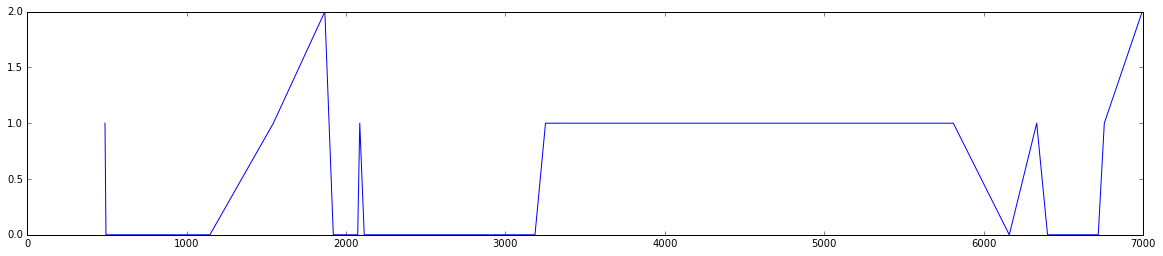

In [30]:
locbool = data['location']==0
plt.plot(data.loc[locbool,'fault_severity'])

In [31]:
# data.sort(['location','id'],inplace=True)

In [32]:
# data[['id','location','resource_type 8','severity_type 1','severity_type 2','fault_severity','event_type 15']].to_csv('eda.csv',index=False)

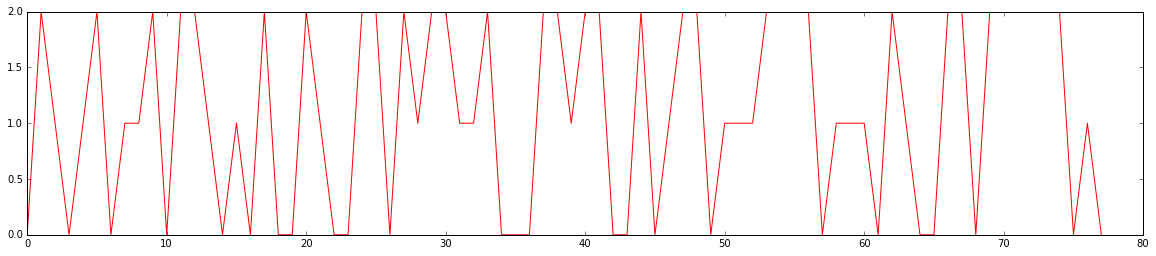

In [33]:
locbool = data['location']==121
plt.plot(range(0,len(data.loc[locbool,'id'].values)),data.loc[locbool,'fault_severity'].values,c='red')

In [34]:
# locdict = {}
# def loc_id(x):
#     if x['location'] in locdict:
#         locdict[x['location']].append(x['id'])
#     else:
#         locdict[x['location']] = [x['id']]
# data[['id','location']].apply(loc_id,axis=1)
# print 'done'

In [35]:
loc_counter = {}
def loc_count(x):
    if x['location'] in loc_counter:
        loc_counter[x['location']]+=1
    else:
        loc_counter[x['location']]=1
    return loc_counter[x['location']]
data['location_occurence_count'] = data[['id','location']].apply(loc_count,axis=1)

In [36]:
locbool = data['location']==832
data.loc[locbool,['id','location','location_occurence_count']].head()

,id,location,location_occurence_count
61,142,832,1
164,411,832,2
206,498,832,3
239,594,832,4
268,679,832,5


In [37]:
data.loc[:,['id','location','location_occurence_count']].head(100)

,id,location,location_occurence_count
0,1,685,1
1,5,528,1
2,6,386,1
3,8,287,1
4,13,481,1
5,19,732,1
6,20,893,1
7,23,302,1
8,24,424,1
9,26,281,1


## Divide back into test and train

In [38]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train.drop('source',axis=1,inplace=True)
test.drop(['source','fault_severity'],axis=1,inplace=True)
train.to_csv('data/train_modified_10.csv',index=False)
test.to_csv('data/test_modified_10.csv',index=False)

/Users/aarshay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/aarshay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
